In [1]:
pip install pandas numpy  seaborn missingno matplotlib scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:

import pandas as pd
import json
import os
import missingno as ms
import seaborn as sns #---Seaborn for graphs
import matplotlib.pyplot as plt #---Pyplot for canvas (e.g. figure size, title, x and y axis ranges etc.)
CONFIG_PATH = "/mnt/DATA/00-GSSI/00-WORK/EXAMPLE_ROOT_DIRECTORY_MODELS/config.json"
import sklearn as skl

In [3]:
configObj = None
dataCsvPath = None
with open(CONFIG_PATH) as file:
    configObj = json. load(file)
configObj

{'archivesForSearching': ['/mnt/DATA/00-GSSI/00-WORK/EXAMPLE_ROOT_DIRECTORY_MODELS/others/repositories-aadl'],
 'timeCacheForDiscoveringSearchOverFilesInSeconds': 300,
 'avoidFileNames': ['.git', '.gitignore', '.project', '.aadlbin-gen'],
 'extensionsForSearching': ['aadl'],
 'outputFolderName': 'output-processing',
 'timeCacheForPollingFromExternalResources': 300,
 'ecoreRequiredFilesFolder': './ecore',
 'rootPath': '/mnt/DATA/00-GSSI/00-WORK/EXAMPLE_ROOT_DIRECTORY_MODELS',
 'externalResources': []}

In [4]:
dataCsvPath = os.path.join(configObj["rootPath"],"results.csv")
data_df = pd.read_csv(dataCsvPath)
src_paths = list(data_df["src_path"])

print("Number of rows:", data_df.shape[0])
print("Number of columns:", data_df.shape[1])
print("Column names:", list(data_df.columns))

Number of rows: 4427
Number of columns: 23
Column names: ['model_name', 'src_path', 'conv_path', 'src_ext', 'is_parsed', 'is_sys_design', 'sys_name', 'num_comp', 'num_conn', 'size', 'understandability', 'no_hardware_comp', 'no_sys_comp', 'no_software_comp', 'no_data_comp', 'coupling', 'cohesion', 'complexity', 'graph_density', 'avg_shortest_path', 'avg_clust_coeff', 'avg_deg_cent', 'graph_str_rep']


In [5]:
data_df.head()

model_name  \
0                     isolette   
1                     isolette   
2                     isolette   
3                     isolette   
4  isolette_temperature_sensor   

                                            src_path  \
0  /mnt/DATA/00-GSSI/00-WORK/EXAMPLE_ROOT_DIRECTO...   
1  /mnt/DATA/00-GSSI/00-WORK/EXAMPLE_ROOT_DIRECTO...   
2  /mnt/DATA/00-GSSI/00-WORK/EXAMPLE_ROOT_DIRECTO...   
3  /mnt/DATA/00-GSSI/00-WORK/EXAMPLE_ROOT_DIRECTO...   
4  /mnt/DATA/00-GSSI/00-WORK/EXAMPLE_ROOT_DIRECTO...   

                                           conv_path src_ext  is_parsed  \
0  /mnt/DATA/00-GSSI/00-WORK/EXAMPLE_ROOT_DIRECTO...    aadl       True   
1                                                NaN    aadl      False   
2                                                NaN    aadl      False   
3                                                NaN    aadl      False   
4  /mnt/DATA/00-GSSI/00-WORK/EXAMPLE_ROOT_DIRECTO...    aadl       True   

   is_sys_design                          sys_name  num_comp  num_conn  size  \
0           True  Temperature_Sensor_impl_Instance         2         0     2   
1          False                               NaN         0         0     0   
2          False                               NaN         0         0     0   
3          False                               NaN         0         0     0   
4           True  Temperature_Sensor_impl_Instance         2         0     2   

   ...  no_software_comp  no_data_comp  coupling  cohesion  complexity  \
0  ...                 0             0       0.0       0.0           0   
1  ...                 0             0       0.0       0.0           0   
2  ...                 0             0       0.0       0.0           0   
3  ...                 0             0       0.0       0.0           0   
4  ...                 0             0       0.0       0.0           0   

   graph_density  avg_shortest_path  avg_clust_coeff  avg_deg_cent  \
0            0.0                0.0              0.0           0.0   
1            0.0                0.0              0.0           0.0   
2            0.0                0.0              0.0           0.0   
3            0.0                0.0              0.0           0.0   
4            0.0                0.0              0.0           0.0   

                               graph_str_rep  
0  Temperature_Sensor_impl_Instance:system\n  
1                                        NaN  
2                                        NaN  
3                                        NaN  
4  Temperature_Sensor_impl_Instance:system\n  

[5 rows x 23 columns]

## Cleaning the data, filtering the non parsed models and removing some columns

In [6]:
data_df =data_df[(data_df["is_parsed"] == True) & (data_df["is_sys_design"] == True)]
df = data_df.loc[:, ~data_df.columns.isin(['src_path', 'conv_path',"src_ext","doc_files"])]
print("Number of rows:", data_df.shape[0])
print("Number of columns:", data_df.shape[1])
df.head()

Number of rows: 3368
Number of columns: 23


model_name  is_parsed  is_sys_design  \
0                      isolette       True           True   
4   isolette_temperature_sensor       True           True   
10         isolette_heat_source       True           True   
15  isolette_operator_interface       True           True   
16         isolette_heat_source       True           True   

                             sys_name  num_comp  num_conn  size  \
0    Temperature_Sensor_impl_Instance         2         0     2   
4    Temperature_Sensor_impl_Instance         2         0     2   
10          Heat_Source_impl_Instance         6         0     6   
15   Operator_Interface_impl_Instance         2         0     2   
16  Heat_Source_with_devices_Instance         8         7    15   

    understandability  no_hardware_comp  no_sys_comp  no_software_comp  \
0               0.000                 0            2                 0   
4               0.000                 0            2                 0   
10              0.000                 4            2                 0   
15              0.000                 0            2                 0   
16              0.125                 4            1                 3   

    no_data_comp  coupling  cohesion  complexity  graph_density  \
0              0  0.000000  0.000000           0            0.0   
4              0  0.000000  0.000000           0            0.0   
10             0  1.000000  0.000000           2            0.0   
15             0  0.000000  0.000000           0            0.0   
16             0  3.166667  0.333333          11            1.0   

    avg_shortest_path  avg_clust_coeff  avg_deg_cent  \
0            0.000000              0.0         0.000   
4            0.000000              0.0         0.000   
10           0.000000              0.0         0.000   
15           0.000000              0.0         0.000   
16           0.517857              0.0         0.125   

                                        graph_str_rep  
0           Temperature_Sensor_impl_Instance:system\n  
4           Temperature_Sensor_impl_Instance:system\n  
10  Heat_Source_impl_Instance:system; heatsource:d...  
15          Operator_Interface_impl_Instance:system\n  
16  Heat_Source_with_devices_Instance:system; this...

## Example of graph representation

In [7]:
graph_str = data_df["graph_str_rep"][0]
graph_str

'Temperature_Sensor_impl_Instance:system\n'

In [8]:
nodes_str = graph_str.split("\n")[0]
edges_str = graph_str.split("\n")[1]
nodes = nodes_str.split("; ")
edges = edges_str.split("; ")
print("Nodes:", nodes)
print("Edges:", edges)


Nodes: ['Temperature_Sensor_impl_Instance:system']
Edges: ['']


## Exploratory analysis

In [9]:
df_num = df.loc[:, ~df.columns.isin(['graph_str_rep', "is_parsed","is_sys_design"])]
df_num.head()

model_name                           sys_name  num_comp  \
0                      isolette   Temperature_Sensor_impl_Instance         2   
4   isolette_temperature_sensor   Temperature_Sensor_impl_Instance         2   
10         isolette_heat_source          Heat_Source_impl_Instance         6   
15  isolette_operator_interface   Operator_Interface_impl_Instance         2   
16         isolette_heat_source  Heat_Source_with_devices_Instance         8   

    num_conn  size  understandability  no_hardware_comp  no_sys_comp  \
0          0     2              0.000                 0            2   
4          0     2              0.000                 0            2   
10         0     6              0.000                 4            2   
15         0     2              0.000                 0            2   
16         7    15              0.125                 4            1   

    no_software_comp  no_data_comp  coupling  cohesion  complexity  \
0                  0             0  0.000000  0.000000           0   
4                  0             0  0.000000  0.000000           0   
10                 0             0  1.000000  0.000000           2   
15                 0             0  0.000000  0.000000           0   
16                 3             0  3.166667  0.333333          11   

    graph_density  avg_shortest_path  avg_clust_coeff  avg_deg_cent  
0             0.0           0.000000              0.0         0.000  
4             0.0           0.000000              0.0         0.000  
10            0.0           0.000000              0.0         0.000  
15            0.0           0.000000              0.0         0.000  
16            1.0           0.517857              0.0         0.125

In [10]:
df_num.isnull().sum()

model_name           0
sys_name             0
num_comp             0
num_conn             0
size                 0
understandability    0
no_hardware_comp     0
no_sys_comp          0
no_software_comp     0
no_data_comp         0
coupling             0
cohesion             0
complexity           0
graph_density        0
avg_shortest_path    0
avg_clust_coeff      0
avg_deg_cent         0
dtype: int64

<AxesSubplot: title={'center': 'Missing Values'}>

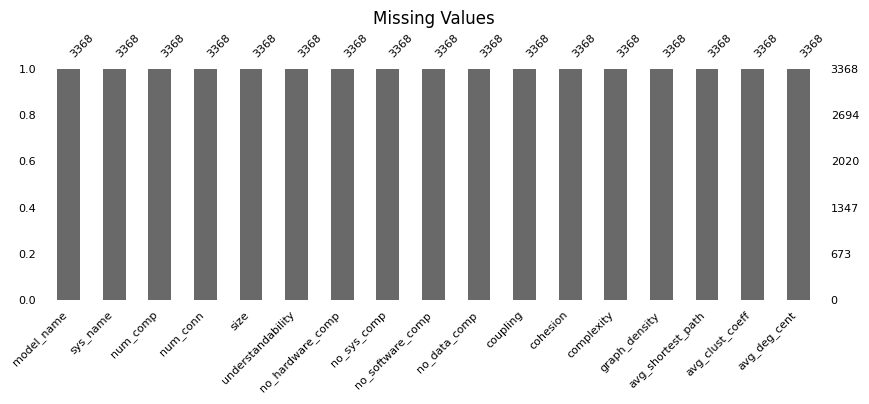

In [11]:
# Missing values
plt.title("Missing Values", fontsize=12)
ms.bar(df_num,fontsize=8,figsize=(10,3))

## Distribution for numerical metrics

### Distributions for amount of component, connection and size of every model

(0.0, 200.0)

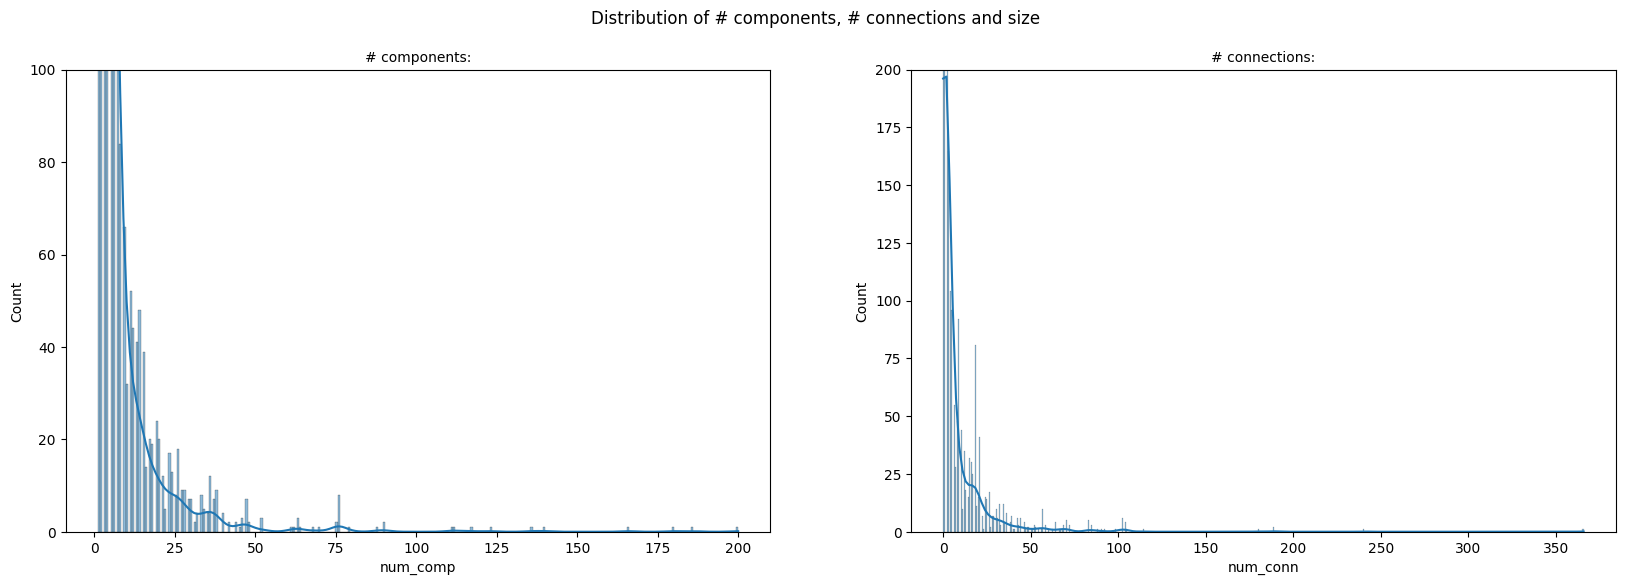

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle('Distribution of # components, # connections and size',fontsize=12)
axes[0].set_title('# components:',fontsize=10)
axes[1].set_title('# connections:',fontsize=10)
# axes[2].set_title('# size:',fontsize=10)
sns.histplot(ax=axes[0],data=df_num['num_comp'],kde=True);
sns.histplot(ax=axes[1],data=df_num['num_conn'],kde=True);
axes[0].set_ylim([0, 100])
axes[1].set_ylim([0, 200])
# sns.histplot(ax=axes[2],data=df_num['size'],kde=True);


### Description for the size parametter

<AxesSubplot: >

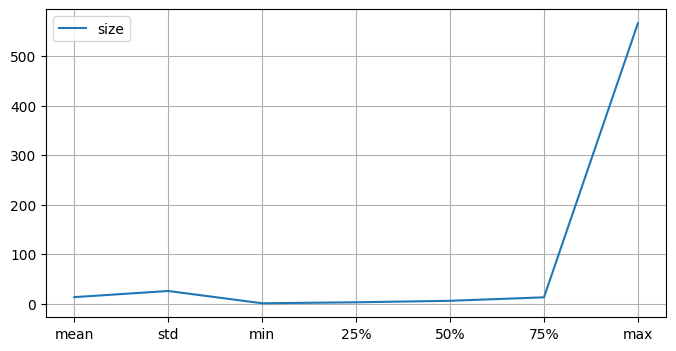

In [13]:
plt.figure(figsize=(8,4))
plt.grid()
sns.lineplot(data=df_num[["size"]].describe().drop("count",axis=0))

In [14]:
df_num[["size"]].describe()

size
count  3368.000000
mean     13.376485
std      25.798611
min       1.000000
25%       3.000000
50%       6.000000
75%      13.000000
max     566.000000

In [15]:
small_size = df_num[(df_num["size"] >= 1) & (df_num["size"] <= 13) ]
(x,_) = small_size.shape
print("percent: ", ((x) / df_num.shape[0])*100)
small_size

percent:  76.15795724465558


model_name                          sys_name  num_comp  \
0                        isolette  Temperature_Sensor_impl_Instance         2   
4     isolette_temperature_sensor  Temperature_Sensor_impl_Instance         2   
10           isolette_heat_source         Heat_Source_impl_Instance         6   
15    isolette_operator_interface  Operator_Interface_impl_Instance         2   
17        JustSubrogram_thread_fg                Root_impl_Instance         5   
...                           ...                               ...       ...   
4418                         test                node_impl_Instance         8   
4419                         test                node_impl_Instance        10   
4422              case_study_osal                   osal_i_Instance         9   
4424                         test                node_impl_Instance         5   
4426                   adaruntime                node_impl_Instance         5   

      num_conn  size  understandability  no_hardware_comp  no_sys_comp  \
0            0     2                0.0                 0            2   
4            0     2                0.0                 0            2   
10           0     6                0.0                 4            2   
15           0     2                0.0                 0            2   
17           2     7                0.1                 0            1   
...        ...   ...                ...               ...          ...   
4418         0     8                0.0                 1            1   
4419         0    10                0.0                 1            1   
4422         0     9                0.0                 4            1   
4424         0     5                0.0                 1            1   
4426         0     5                0.0                 1            1   

      no_software_comp  no_data_comp  coupling  cohesion  complexity  \
0                    0             0       0.0  0.000000           0   
4                    0             0       0.0  0.000000           0   
10                   0             0       1.0  0.000000           2   
15                   0             0       0.0  0.000000           0   
17                   4             0       1.0  0.333333           0   
...                ...           ...       ...       ...         ...   
4418                 6             0       0.0  0.000000           0   
4419                 8             0       0.0  0.000000           0   
4422                 4             0       0.0  0.000000           0   
4424                 3             0       0.0  0.000000           0   
4426                 3             0       0.0  0.000000           0   

      graph_density  avg_shortest_path  avg_clust_coeff  avg_deg_cent  
0               0.0                0.0              0.0           0.0  
4               0.0                0.0              0.0           0.0  
10              0.0                0.0              0.0           0.0  
15              0.0                0.0              0.0           0.0  
17              0.5                0.4              0.0           0.2  
...             ...                ...              ...           ...  
4418            0.0                0.0              0.0           0.0  
4419            0.0                0.0              0.0           0.0  
4422            0.0                0.0              0.0           0.0  
4424            0.0                0.0              0.0           0.0  
4426            0.0                0.0              0.0           0.0  

[2565 rows x 17 columns]

### Distributions for amount of category of the components

(0.0, 200.0)

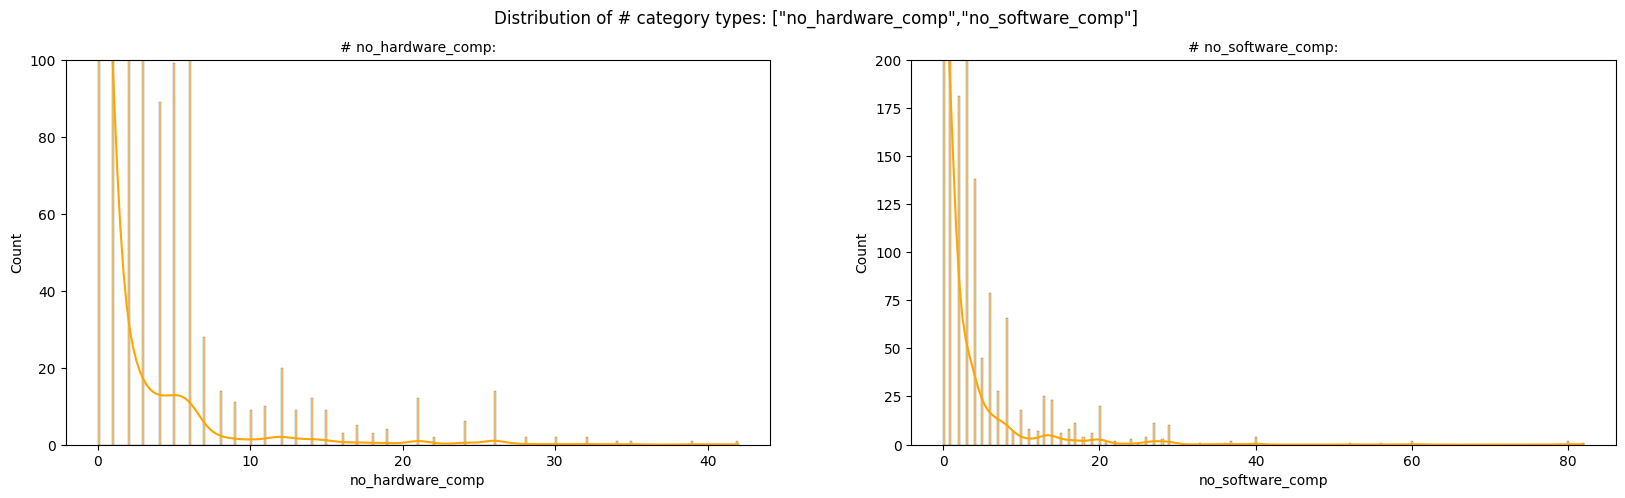

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(20,5))
fig.suptitle('Distribution of # category types: ["no_hardware_comp","no_software_comp"]',fontsize=12)
axes[0].set_title('# no_hardware_comp:',fontsize=10)
axes[1].set_title('# no_software_comp:',fontsize=10)
sns.histplot(ax=axes[0],data=df_num['no_hardware_comp'],kde=True,color='orange');
sns.histplot(ax=axes[1],data=df_num['no_software_comp'],kde=True,color='orange');
axes[0].set_ylim([0, 100])
axes[1].set_ylim([0, 200])

### Description for no_hardware_comp and no_software_comp

In [17]:
df_num[["no_hardware_comp"]].describe()

no_hardware_comp
count       3368.000000
mean           1.546912
std            3.875114
min            0.000000
25%            0.000000
50%            0.000000
75%            1.000000
max           42.000000

In [18]:
df_num[["no_software_comp"]].describe()

no_software_comp
count       3368.000000
mean           2.089074
std            5.476338
min            0.000000
25%            0.000000
50%            0.000000
75%            2.000000
max           82.000000

In [19]:
df_num[df_num["no_software_comp"]>= 5]

model_name              sys_name  num_comp  num_conn  size  \
61                Software    DCA_tier2_Instance         7         6    13   
72               StopAndGo    Root_impl_Instance        10         5    15   
118   BadAccessConnections    Sys1_impl_Instance        12        10    22   
120   BadAccessConnections    Sys3_impl_Instance        14        10    24   
128                   bscu     bscu_ima_Instance        14        15    29   
...                    ...                   ...       ...       ...   ...   
4418                  test    node_impl_Instance         8         0     8   
4419                  test    node_impl_Instance        10         0    10   
4420      ardupilot_system  ardupilot_i_Instance        15         0    15   
4421  heterogenous_systems    node_impl_Instance        19         0    19   
4425                  main       main_i_Instance        37         0    37   

      understandability  no_hardware_comp  no_sys_comp  no_software_comp  \
61             0.142857                 0            1                 6   
72             0.055556                 0            1                 5   
118            0.075758                 2            2                 6   
120            0.054945                 2            4                 6   
128            0.082418                 1            5                 8   
...                 ...               ...          ...               ...   
4418           0.000000                 1            1                 6   
4419           0.000000                 1            1                 8   
4420           0.000000                 6            1                 8   
4421           0.000000                 2            1                16   
4425           0.000000                17            1                19   

      no_data_comp  coupling  cohesion  complexity  graph_density  \
61               0  3.000000  0.400000           9       1.000000   
72               0  4.000000  0.138889           4       0.555556   
118              2  1.000000  0.181818           0       0.909091   
120              2  2.000000  0.128205           0       0.769231   
128              0  3.466667  0.192308          22       1.153846   
...            ...       ...       ...         ...            ...   
4418             0  0.000000  0.000000           0       0.000000   
4419             0  0.000000  0.000000           0       0.000000   
4420             0  0.000000  0.000000           0       0.000000   
4421             0  0.000000  0.000000           0       0.000000   
4425             0  3.933333  0.000000          31       0.000000   

      avg_shortest_path  avg_clust_coeff  avg_deg_cent  
61             1.880952             0.00      0.238095  
72             0.111111             0.00      0.066667  
118            0.075758             0.00      0.075758  
120            0.115385             0.00      0.060440  
128            0.203297             0.15      0.071429  
...                 ...              ...           ...  
4418           0.000000             0.00      0.000000  
4419           0.000000             0.00      0.000000  
4420           0.000000             0.00      0.000000  
4421           0.000000             0.00      0.000000  
4425           0.000000             0.00      0.000000  

[412 rows x 17 columns]

In [20]:
df_num[df_num["no_hardware_comp"] >= 5]

model_name                      sys_name  num_comp  num_conn  \
81           GPSSystem  GPS_parts_TwoSensor_Instance         6         0   
82           GPSSystem            GPS_basic_Instance         7        15   
83           GPSSystem  GPS_BasicRedundancy_Instance         7        12   
84           GPSSystem       GPS_BasicState_Instance         7        12   
85           GPSSystem     GPS_computeerror_Instance         7        12   
...                ...                           ...       ...       ...   
4415   case_study_osal               osal_i_Instance        18         0   
4416              test            node_impl_Instance        14         0   
4417           systems        mysystem_impl_Instance        29         0   
4420  ardupilot_system          ardupilot_i_Instance        15         0   
4425              main               main_i_Instance        37         0   

      size  understandability  no_hardware_comp  no_sys_comp  \
81       6           0.000000                 5            1   
82      22           0.357143                 5            1   
83      19           0.285714                 5            1   
84      19           0.285714                 5            1   
85      19           0.285714                 5            1   
...    ...                ...               ...          ...   
4415    18           0.000000                11            1   
4416    14           0.000000                 5            1   
4417    29           0.000000                15            1   
4420    15           0.000000                 6            1   
4425    37           0.000000                17            1   

      no_software_comp  no_data_comp  coupling  cohesion  complexity  \
81                   0             0  3.500000       0.0           6   
82                   1             0  4.166667       1.0           8   
83                   1             0  4.166667       0.8           8   
84                   1             0  4.166667       0.8           8   
85                   1             0  4.166667       0.8           8   
...                ...           ...       ...       ...         ...   
4415                 6             0  0.000000       0.0           0   
4416                 8             0  0.000000       0.0           0   
4417                13             0  1.000000       0.0           8   
4420                 8             0  0.000000       0.0           0   
4425                19             0  3.933333       0.0          31   

      graph_density  avg_shortest_path  avg_clust_coeff  avg_deg_cent  
81              0.0           0.000000             0.00      0.000000  
82              2.5           1.095238             0.06      0.309524  
83              2.0           0.523810             0.08      0.238095  
84              2.0           0.523810             0.07      0.238095  
85              2.0           0.523810             0.12      0.238095  
...             ...                ...              ...           ...  
4415            0.0           0.000000             0.00      0.000000  
4416            0.0           0.000000             0.00      0.000000  
4417            0.0           0.000000             0.00      0.000000  
4420            0.0           0.000000             0.00      0.000000  
4425            0.0           0.000000             0.00      0.000000  

[382 rows x 17 columns]

In [21]:
df_num[["no_data_comp"]].describe()

no_data_comp
count   3368.000000
mean       0.796615
std        6.119192
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      170.000000

In [22]:
df_num[df_num["no_data_comp"] >= 5]

model_name                                       sys_name  \
333   CasePositionControl                          SMS_buffered_Instance   
336   CasePositionControl  SMS_Operational_Environment_buffered_Instance   
369      DeclarativeTests         Sub_to_provides_comp_outgoing_Instance   
370      DeclarativeTests         Sub_to_provides_comp_incoming_Instance   
371      DeclarativeTests            Sub_to_provides_comp_bidir_Instance   
...                   ...                                            ...   
4293          DroneSystem                DroneSystem_rendezvous_Instance   
4294          DroneSystem                DroneSystem_rendezvous_Instance   
4295          DroneSystem                DroneSystem_rendezvous_Instance   
4301              Drones3                    Drones3_rendezvous_Instance   
4303             DataView                 Taste_DataView_others_Instance   

      num_comp  num_conn  size  understandability  no_hardware_comp  \
333         12        13    25           0.098485                 2   
336         19        21    40           0.061404                 6   
369          6         9    15           0.300000                 0   
370          6         9    15           0.300000                 0   
371          6        18    24           0.600000                 0   
...        ...       ...   ...                ...               ...   
4293        11         8    19           0.072727                 0   
4294        11         8    19           0.072727                 0   
4295        11         8    19           0.072727                 0   
4301        68        36   104           0.007902                 0   
4303       111         0   111           0.000000                 0   

      no_sys_comp  no_software_comp  no_data_comp  coupling  cohesion  \
333             1                 3             6  2.238095  0.236364   
336             4                 3             6  5.654762  0.137255   
369             1                 0             5  0.000000  0.900000   
370             1                 0             5  0.000000  0.900000   
371             1                 0             5  0.000000  1.800000   
...           ...               ...           ...       ...       ...   
4293            3                 2             6  2.000000  0.177778   
4294            3                 2             6  2.000000  0.177778   
4295            3                 2             6  2.000000  0.177778   
4301           20                12            36  7.500000  0.034091   
4303            1                 0           110  0.000000  0.000000   

      complexity  graph_density  avg_shortest_path  avg_clust_coeff  \
333           22       1.181818           0.143939             0.16   
336           29       1.166667           0.836257             0.16   
369            0       1.800000           0.166667             0.00   
370            0       1.800000           0.000000             0.00   
371            0       3.600000           0.166667             0.00   
...          ...            ...                ...              ...   
4293          52       0.800000           0.745455             0.00   
4294          52       0.800000           0.745455             0.00   
4295          52       0.800000           0.745455             0.00   
4301         168       0.545455           1.697861             0.00   
4303           0       0.000000           0.000000             0.00   

      avg_deg_cent  
333       0.053030  
336       0.064327  
369       0.166667  
370       0.000000  
371       0.166667  
...            ...  
4293      0.100000  
4294      0.100000  
4295      0.100000  
4301      0.034759  
4303      0.000000  

[173 rows x 17 columns]

In [23]:
df_num[df_num["no_sys_comp"] >= 5]

model_name  \
62                   Issue1837   
63                   Issue1837   
64                   Issue1837   
76         ports_bad_endpoints   
96    findSubcomponentInstance   
...                        ...   
4321                       APS   
4322                       APS   
4323                       APS   
4325                       APS   
4337                       RCC   

                                               sys_name  num_comp  num_conn  \
62                          TMR_Archetype_impl_Instance         5         3   
63                         TMR_Archetype_impl2_Instance         5         3   
64                                    top_impl_Instance         6         3   
76                                      top_i2_Instance         5         4   
96                                  toplevel_i_Instance         7         0   
...                                                 ...       ...       ...   
4321                     NavigationSystem_impl_Instance        26        52   
4322      NavigationSystem_impl_withRedundancy_Instance        27        54   
4323     NavigationSystem_impl_withRedundancy2_Instance        33        58   
4325  NavigationSystem_Backup_impl_withRedundancy_In...        13        16   
4337                     APSCommunication_impl_Instance        37        46   

      size  understandability  no_hardware_comp  no_sys_comp  \
62       8           0.150000                 0            5   
63       8           0.150000                 0            5   
64       9           0.100000                 0            6   
76       9           0.200000                 0            5   
96       7           0.000000                 0            7   
...    ...                ...               ...          ...   
4321    78           0.080000                21            5   
4322    81           0.076923                21            6   
4323    91           0.054924                21            8   
4325    29           0.102564                 8            5   
4337    83           0.034535                 1           10   

      no_software_comp  no_data_comp   coupling  cohesion  complexity  \
62                   0             0   0.750000  0.500000           3   
63                   0             0   0.750000  0.500000           3   
64                   0             0   0.750000  0.300000           3   
76                   0             0   2.000000  0.666667           0   
96                   0             0   0.000000  0.000000           0   
...                ...           ...        ...       ...         ...   
4321                 0             0  12.666667  0.173333         318   
4322                 0             0  13.166667  0.166154         382   
4323                 4             0  16.333333  0.116935         395   
4325                 0             0   6.166667  0.242424         170   
4337                26             0  12.455556  0.073016         384   

      graph_density  avg_shortest_path  avg_clust_coeff  avg_deg_cent  
62         0.750000           0.150000             0.00      0.150000  
63         0.750000           0.150000             0.00      0.150000  
64         0.600000           0.100000             0.00      0.100000  
76         1.000000           0.200000             0.00      0.200000  
96         0.000000           0.000000             0.00      0.000000  
...             ...                ...              ...           ...  
4321       2.080000           2.283077             0.00      0.070769  
4322       2.076923           1.072650             0.00      0.066952  
4323       1.812500           0.953598             0.00      0.044508  
4325       1.333333           0.282051             0.00      0.076923  
4337       1.277778           0.655405             0.05      0.035285  

[243 rows x 17 columns]

<AxesSubplot: >

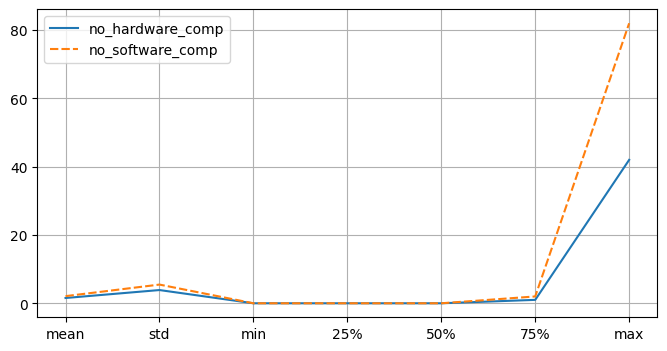

In [24]:
plt.figure(figsize=(8,4))
plt.grid()
sns.lineplot(data=df_num[["no_hardware_comp","no_software_comp"]].describe().drop("count",axis=0))

### Distributions for understandability, cohesion, coupling

(0.0, 40.0)

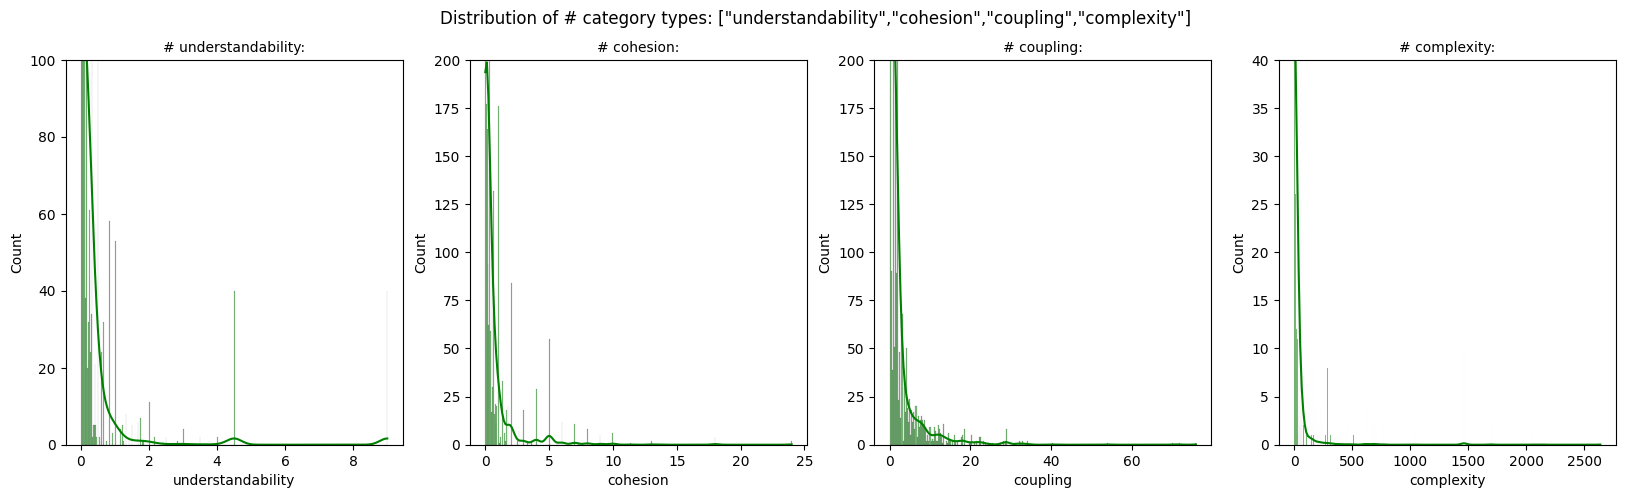

In [25]:
fig, axes = plt.subplots(1, 4, figsize=(20,5))
fig.suptitle('Distribution of # category types: ["understandability","cohesion","coupling","complexity"]',fontsize=12)
axes[0].set_title('# understandability:',fontsize=10)
axes[1].set_title('# cohesion:',fontsize=10)
axes[2].set_title('# coupling:',fontsize=10)
axes[3].set_title('# complexity:',fontsize=10)
sns.histplot(ax=axes[0],data=df_num['understandability'],kde=True,color='green');
sns.histplot(ax=axes[1],data=df_num['cohesion'],kde=True,color='green');
sns.histplot(ax=axes[2],data=df_num['coupling'],kde=True,color='green');
sns.histplot(ax=axes[3],data=df_num['complexity'],kde=True,color='green');
axes[0].set_ylim([0, 100])
axes[1].set_ylim([0, 200])
axes[2].set_ylim([0, 200])
axes[3].set_ylim([0, 40])

### Description for understandability and cohesion

In [26]:
df_num["coupling"].describe()

count    3368.000000
mean        2.151909
std         4.690361
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max        75.961328
Name: coupling, dtype: float64

In [27]:
df_num[(df_num["complexity"] >=6) & (df_num["complexity"] <= 8) ]

model_name                                 sys_name  \
81                   GPSSystem             GPS_parts_TwoSensor_Instance   
82                   GPSSystem                       GPS_basic_Instance   
83                   GPSSystem             GPS_BasicRedundancy_Instance   
84                   GPSSystem                  GPS_BasicState_Instance   
85                   GPSSystem                GPS_computeerror_Instance   
...                        ...                                      ...   
4233  pacemaker_models_revised  Device_Controller_Monitor_impl_Instance   
4252           pacemaker_modes            Pulse_Generator_impl_Instance   
4269           pacemaker_modes            Pulse_Generator_impl_Instance   
4345           Mobile5GNetwork           APSCommunication_impl_Instance   
4417                   systems                   mysystem_impl_Instance   

      num_comp  num_conn  size  understandability  no_hardware_comp  \
81           6         0     6           0.000000                 5   
82           7        15    22           0.357143                 5   
83           7        12    19           0.285714                 5   
84           7        12    19           0.285714                 5   
85           7        12    19           0.285714                 5   
...        ...       ...   ...                ...               ...   
4233         5         4     9           0.200000                 2   
4252         4         8    12           0.666667                 3   
4269         4         8    12           0.666667                 3   
4345         3         8    11           1.333333                 0   
4417        29         0    29           0.000000                15   

      no_sys_comp  no_software_comp  no_data_comp  coupling  cohesion  \
81              1                 0             0  3.500000  0.000000   
82              1                 1             0  4.166667  1.000000   
83              1                 1             0  4.166667  0.800000   
84              1                 1             0  4.166667  0.800000   
85              1                 1             0  4.166667  0.800000   
...           ...               ...           ...       ...       ...   
4233            1                 2             0  1.000000  0.666667   
4252            1                 0             0  1.100000  2.666667   
4269            1                 0             0  1.100000  2.666667   
4345            3                 0             0  1.000000  8.000000   
4417            1                13             0  1.000000  0.000000   

      complexity  graph_density  avg_shortest_path  avg_clust_coeff  \
81             6       0.000000           0.000000             0.00   
82             8       2.500000           1.095238             0.06   
83             8       2.000000           0.523810             0.08   
84             8       2.000000           0.523810             0.07   
85             8       2.000000           0.523810             0.12   
...          ...            ...                ...              ...   
4233           8       1.000000           0.250000             0.00   
4252           7       2.666667           0.583333             0.00   
4269           7       2.666667           0.583333             0.00   
4345           8       4.000000           0.333333             0.00   
4417           8       0.000000           0.000000             0.00   

      avg_deg_cent  
81        0.000000  
82        0.309524  
83        0.238095  
84        0.238095  
85        0.238095  
...            ...  
4233      0.150000  
4252      0.250000  
4269      0.250000  
4345      0.333333  
4417      0.000000  

[127 rows x 17 columns]

(0.0, 5.0)

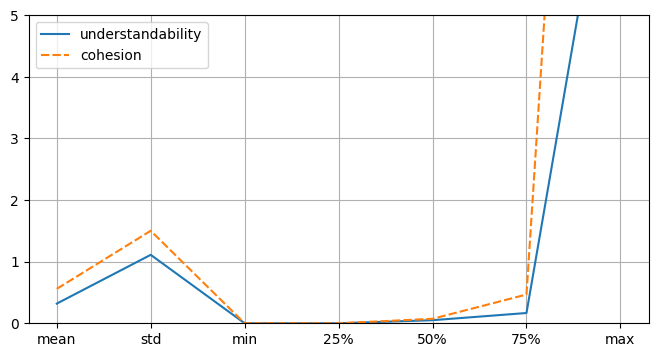

In [28]:
plt.figure(figsize=(8,4))
plt.grid()
sns.lineplot(data=df_num[["understandability","cohesion"]].describe().drop("count",axis=0))
plt.ylim([0, 5])

### Description for coupling

(0.0, 40.0)

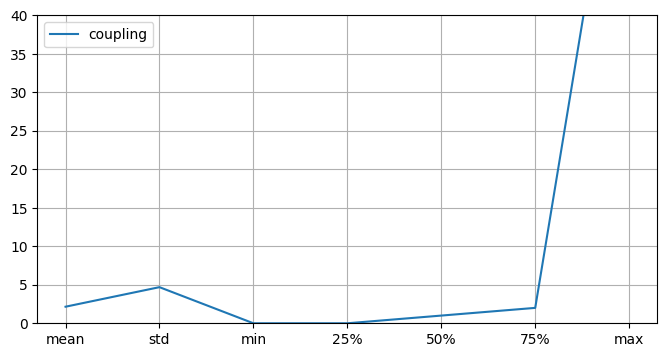

In [29]:
plt.figure(figsize=(8,4))
plt.grid()
sns.lineplot(data=df_num[["coupling"]].describe().drop("count",axis=0))
plt.ylim([0, 40])

### Distributions for graph metrics graph_density, avg_shortest_path, avg_clust_coeff, avg_deg_cent

(0.0, 800.0)

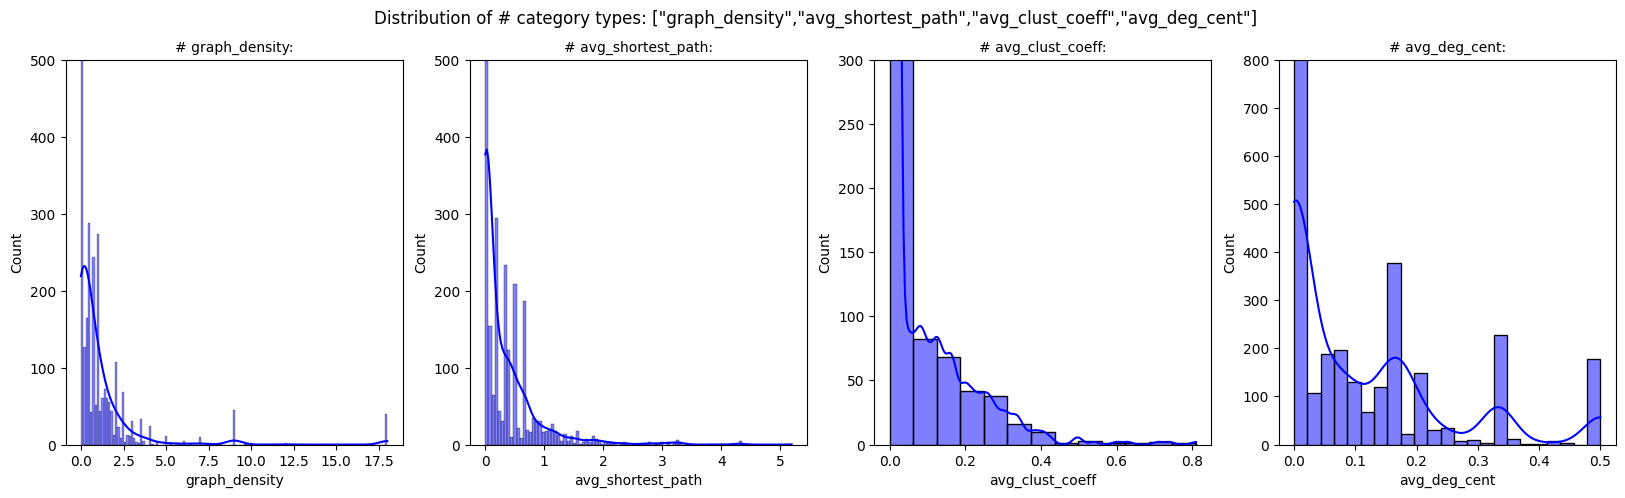

In [30]:
fig, axes = plt.subplots(1, 4, figsize=(20,5))
fig.suptitle('Distribution of # category types: ["graph_density","avg_shortest_path","avg_clust_coeff","avg_deg_cent"]',fontsize=12)
axes[0].set_title('# graph_density:',fontsize=10)
axes[1].set_title('# avg_shortest_path:',fontsize=10)
axes[2].set_title('# avg_clust_coeff:',fontsize=10)
axes[3].set_title('# avg_deg_cent:',fontsize=10)
sns.histplot(ax=axes[0],data=df_num['graph_density'],kde=True,color='blue');
sns.histplot(ax=axes[1],data=df_num['avg_shortest_path'],kde=True,color='blue');
sns.histplot(ax=axes[2],data=df_num['avg_clust_coeff'],kde=True,color='blue');
sns.histplot(ax=axes[3],data=df_num['avg_deg_cent'],kde=True,color='blue');
axes[0].set_ylim([0, 500])
axes[1].set_ylim([0, 500])
axes[2].set_ylim([0, 300])
axes[3].set_ylim([0, 800])

### Description for avg_shortest_path, graph_density, avg_deg_cent, avg_clust_coeff

<AxesSubplot: >

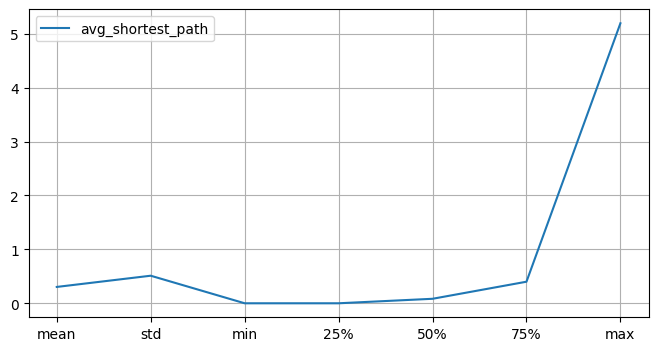

In [31]:
plt.figure(figsize=(8,4))
plt.grid()
sns.lineplot(data=df_num[["avg_shortest_path"]].describe().drop("count",axis=0))

<AxesSubplot: >

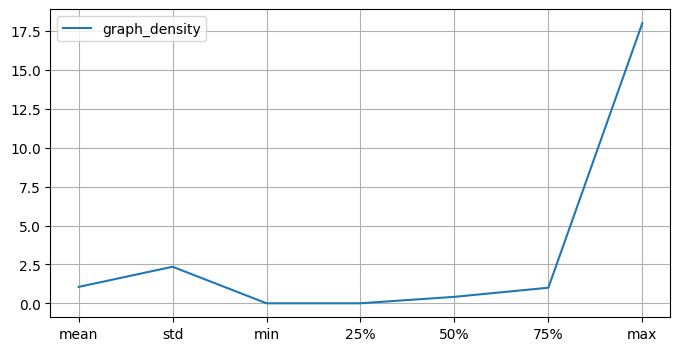

In [32]:
plt.figure(figsize=(8,4))
plt.grid()
sns.lineplot(data=df_num[["graph_density"]].describe().drop("count",axis=0))

<AxesSubplot: >

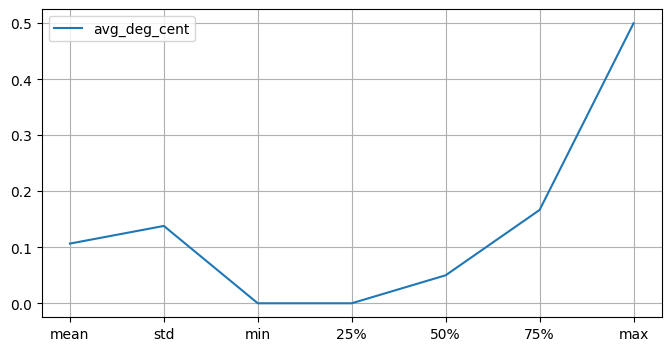

In [33]:
plt.figure(figsize=(8,4))
plt.grid()
sns.lineplot(data=df_num[["avg_deg_cent"]].describe().drop("count",axis=0))

<AxesSubplot: >

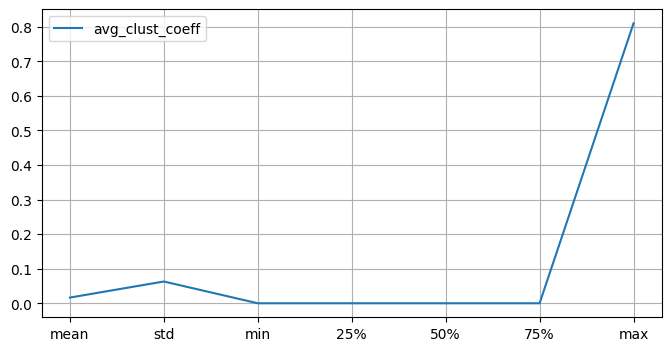

In [34]:
plt.figure(figsize=(8,4))
plt.grid()
sns.lineplot(data=df_num[["avg_clust_coeff"]].describe().drop("count",axis=0))

## Trying to get reelation between variables

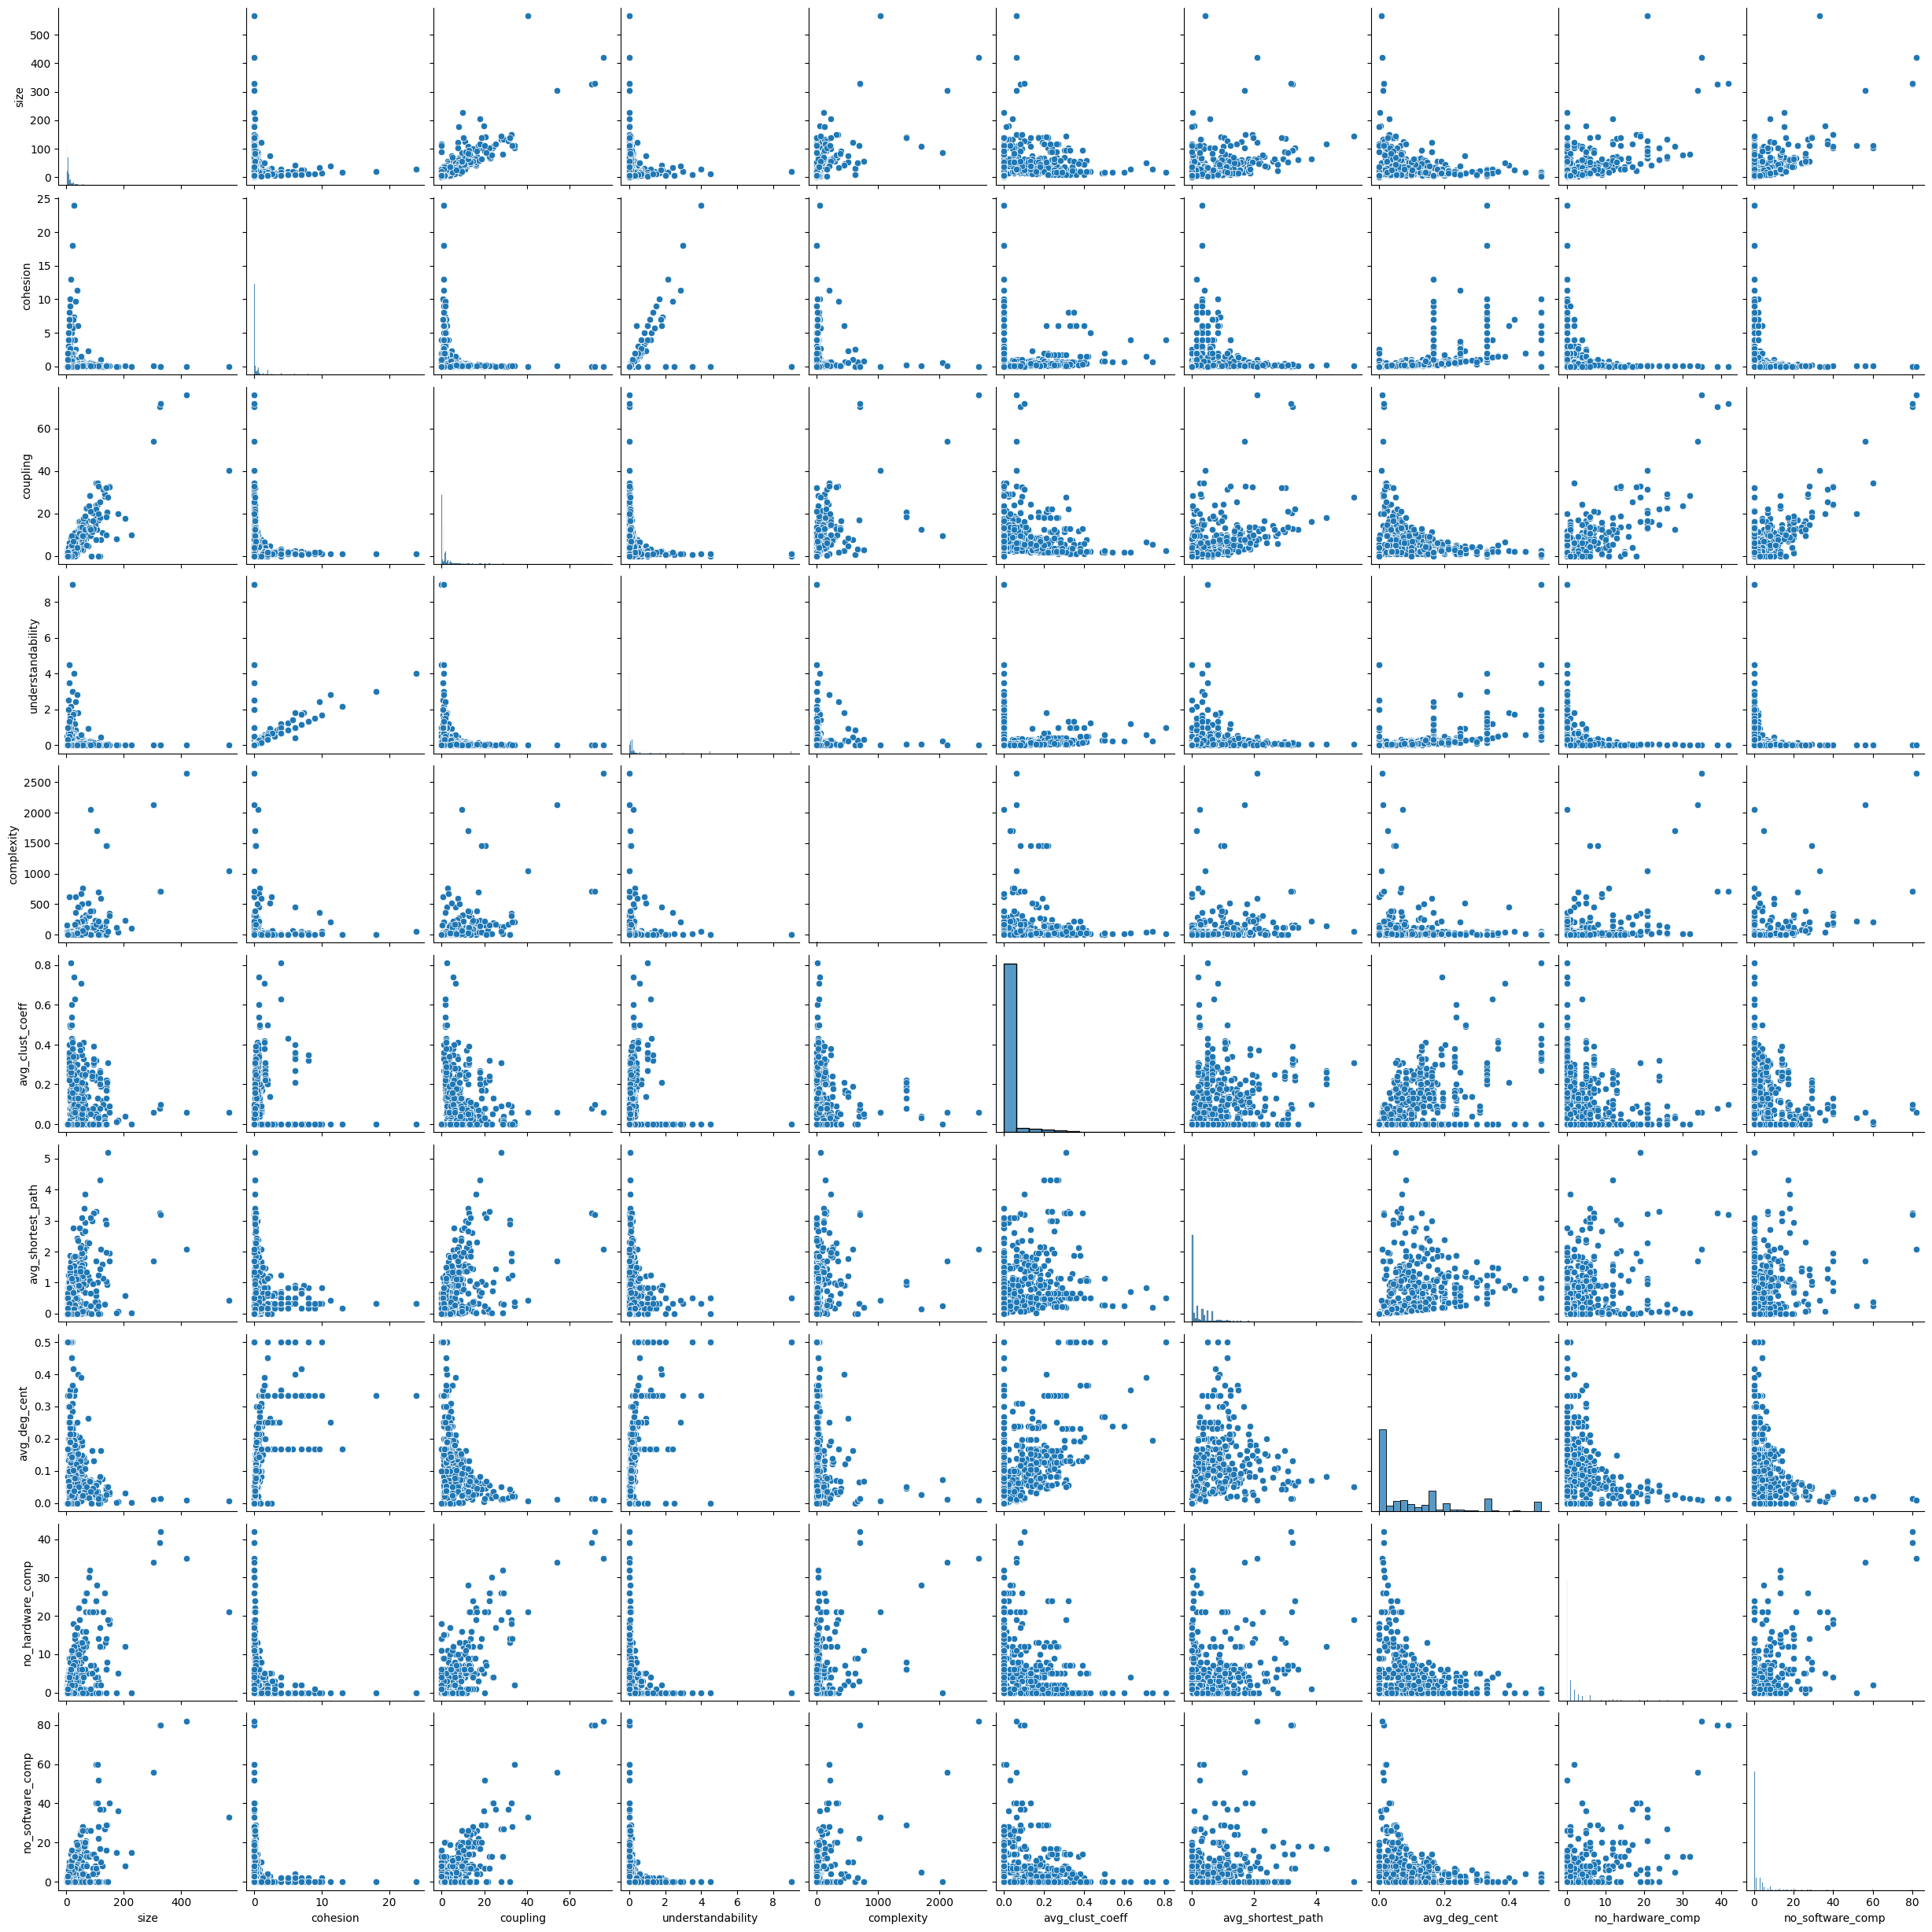

In [35]:
sns.pairplot(df_num[["size","cohesion","coupling","understandability","complexity","avg_clust_coeff","avg_shortest_path","avg_deg_cent","no_hardware_comp",
                             "no_software_comp"]])


### Correlation Matrix

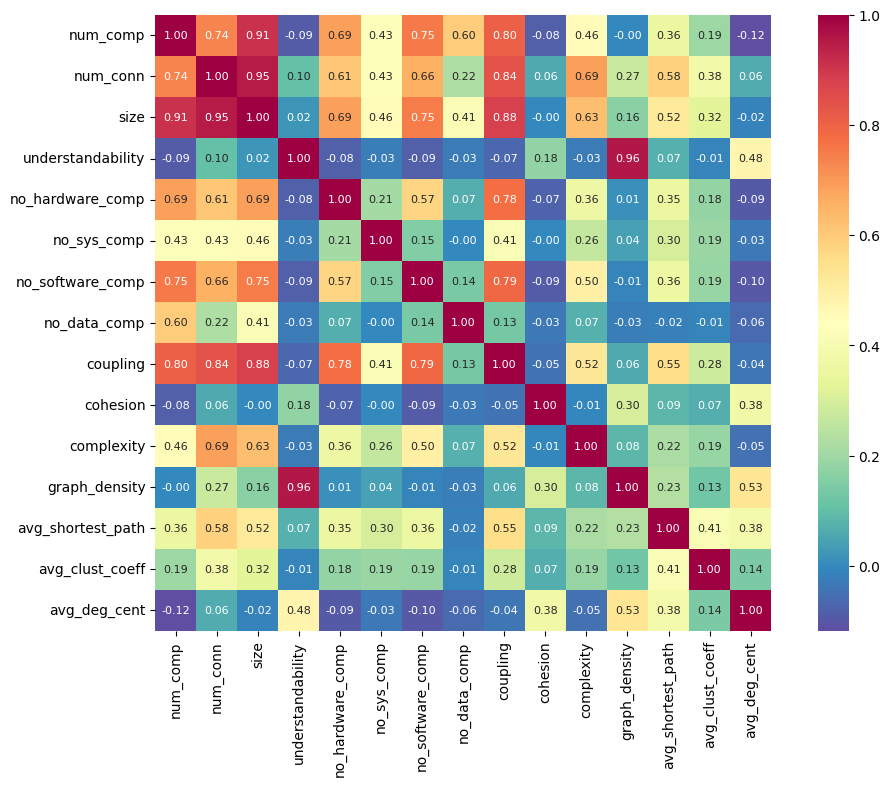

In [36]:
plt.figure(figsize=(12,8))
df_num_corr =  df_num.loc[:, ~df_num.columns.isin(['model_name', "sys_name"])]
corrmat = df_num_corr.corr()
hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 8}, 
                 yticklabels=df_num_corr.columns, 
                 xticklabels=df_num_corr.columns, 
                 cmap="Spectral_r")
plt.show()

## Clustering

In [37]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans

In [38]:
X =  df_num.loc[:, ~df_num.columns.isin(['model_name', "sys_name"])].values

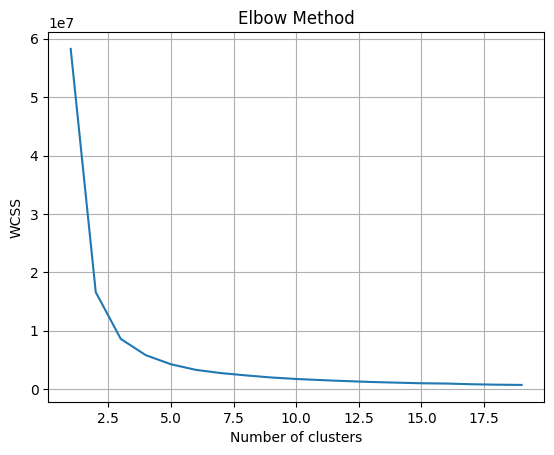

In [39]:
wcss = []

for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the WCSS versus the number of clusters
plt.plot(range(1, 20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [40]:
model = KMeans(n_clusters=5,n_init="auto")
model.fit(X)

KMeans(n_clusters=5, n_init='auto')

In [41]:
# assign a cluster to each example
labels = model.predict(X)
clusters = unique(labels)
centroids = model.cluster_centers_
print(labels)
print(clusters)

[0 0 0 ... 0 0 0]
[0 1 2 3 4]


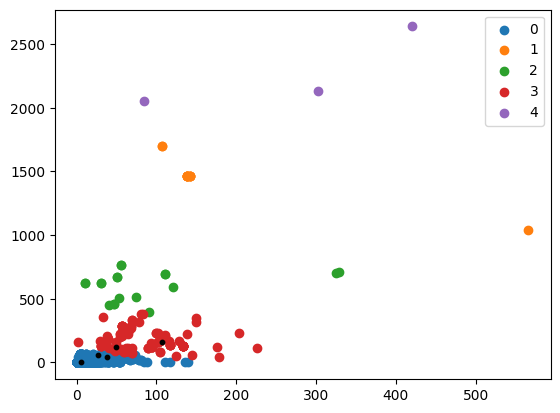

In [42]:
for cluster in clusters:
    plt.scatter(df_num[labels == cluster]["size"],df_num[labels == cluster]["complexity"], label = cluster)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 10, color = 'k')
plt.legend()
plt.show()

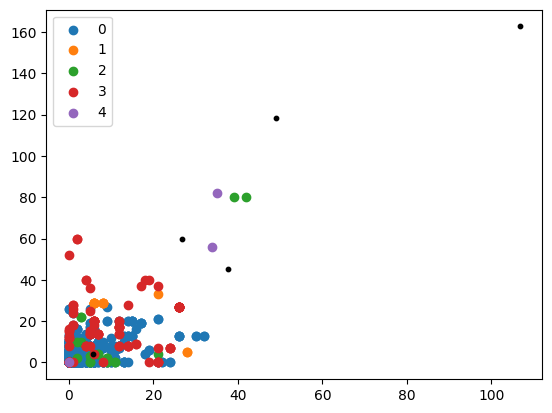

In [43]:
for cluster in clusters:
    plt.scatter(df_num[labels == cluster]["no_hardware_comp"],df_num[labels == cluster]["no_software_comp"], label = cluster)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 10, color = 'k')
plt.legend()
plt.show()

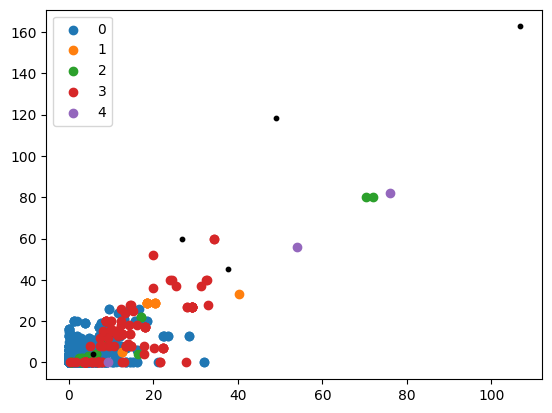

In [44]:
for cluster in clusters:
    plt.scatter(df_num[labels == cluster]["coupling"],df_num[labels == cluster]["no_software_comp"], label = cluster)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 10, color = 'k')
plt.legend()
plt.show()

In [45]:
df_num[labels == 1]

model_name                     sys_name  num_comp  num_conn  size  \
1316  Main_Ardupilot  Ardupilot_Map_impl_Instance        35        72   107   
1364             RAP    RAP_GENERIC_IMPL_Instance        36       102   138   
1365             RAP      RAP_LEON_RTEMS_Instance        36       102   138   
1366             RAP        RAP_LEON_ORK_Instance        38       104   142   
1367             RAP       RAP_ERC32_ORK_Instance        38       104   142   
1368             RAP          RAP_Native_Instance        36       102   138   
1552             RAP    RAP_GENERIC_IMPL_Instance        36       102   138   
1553             RAP      RAP_LEON_RTEMS_Instance        36       102   138   
1554             RAP        RAP_LEON_ORK_Instance        38       104   142   
1555             RAP       RAP_ERC32_ORK_Instance        38       104   142   
1556             RAP          RAP_Native_Instance        36       102   138   
1574  Main_Ardupilot  Ardupilot_Map_impl_Instance        35        72   107   
2898             UAV            UAV_Impl_Instance       200       366   566   

      understandability  no_hardware_comp  no_sys_comp  no_software_comp  \
1316           0.060504                28            2                 5   
1364           0.080952                 6            1                29   
1365           0.080952                 6            1                29   
1366           0.073969                 8            1                29   
1367           0.073969                 8            1                29   
1368           0.080952                 6            1                29   
1552           0.080952                 6            1                29   
1553           0.080952                 6            1                29   
1554           0.073969                 8            1                29   
1555           0.073969                 8            1                29   
1556           0.080952                 6            1                29   
1574           0.060504                28            2                 5   
2898           0.009196                21            5                33   

      no_data_comp   coupling  cohesion  complexity  graph_density  \
1316             0  12.505714  0.128342        1698       2.117647   
1364             0  18.509280  0.171429        1463       2.914286   
1365             0  18.509280  0.171429        1463       2.914286   
1366             0  20.509280  0.156156        1463       2.810811   
1367             0  20.509280  0.156156        1463       2.810811   
1368             0  18.509280  0.171429        1463       2.914286   
1552             0  18.509280  0.171429        1463       2.914286   
1553             0  18.509280  0.171429        1463       2.914286   
1554             0  20.509280  0.156156        1463       2.810811   
1555             0  20.509280  0.156156        1463       2.810811   
1556             0  18.509280  0.171429        1463       2.914286   
1574             0  12.505714  0.128342        1698       2.117647   
2898           141  40.317128  0.018578        1041       1.839196   

      avg_shortest_path  avg_clust_coeff  avg_deg_cent  
1316           0.160504             0.04      0.025210  
1364           1.034921             0.17      0.050000  
1365           1.034921             0.13      0.050000  
1366           0.928876             0.17      0.046230  
1367           0.928876             0.22      0.046230  
1368           1.034921             0.22      0.050000  
1552           1.034921             0.18      0.050000  
1553           1.034921             0.19      0.050000  
1554           0.928876             0.21      0.046230  
1555           0.928876             0.08      0.046230  
1556           1.034921             0.17      0.050000  
1574           0.160504             0.03      0.025210  
2898           0.431583             0.06      0.007588

In [46]:
df_num[labels == 3]

model_name  \
439               functional::main   
440               functional::main   
965   functional::WheelBrake::Main   
1013             integration::main   
1096                     example05   
...                            ...   
4310                           APS   
4321                           APS   
4322                           APS   
4325                           APS   
4337                           RCC   

                                               sys_name  num_comp  num_conn  \
439                             Aircraft_basic_Instance        18        21   
440                   DecelerateAircraft_basic_Instance        12        21   
965                     DecelerateWheels_basic_Instance        10        21   
1013                                 main_impl_Instance        47        53   
1096                         protector_swarm_i_Instance       112        67   
...                                                 ...       ...       ...   
4310                                  ASC_impl_Instance        61        50   
4321                     NavigationSystem_impl_Instance        26        52   
4322      NavigationSystem_impl_withRedundancy_Instance        27        54   
4325  NavigationSystem_Backup_impl_withRedundancy_In...        13        16   
4337                     APSCommunication_impl_Instance        37        46   

      size  understandability  no_hardware_comp  no_sys_comp  \
439     39           0.068627                 0           18   
440     33           0.159091                 0           12   
965     31           0.233333                 0           10   
1013   100           0.024514                 4           35   
1096   179           0.005389                 5            6   
...    ...                ...               ...          ...   
4310   111           0.013661                 0            9   
4321    78           0.080000                21            5   
4322    81           0.076923                21            6   
4325    29           0.102564                 8            5   
4337    83           0.034535                 1           10   

      no_software_comp  no_data_comp   coupling  cohesion  complexity  \
439                  0             0   7.000000  0.154412         183   
440                  0             0   4.000000  0.381818         153   
965                  0             0   3.500000  0.583333         128   
1013                 8             0  14.788095  0.051208         235   
1096                36            65  19.850000  0.010975          44   
...                ...           ...        ...       ...         ...   
4310                52             0  20.000000  0.028249         218   
4321                 0             0  12.666667  0.173333         318   
4322                 0             0  13.166667  0.166154         382   
4325                 0             0   6.166667  0.242424         170   
4337                26             0  12.455556  0.073016         384   

      graph_density  avg_shortest_path  avg_clust_coeff  avg_deg_cent  
439        1.235294           0.382353             0.01      0.039216  
440        1.909091           0.075758             0.02      0.045455  
965        2.333333           0.044444             0.00      0.022222  
1013       1.152174           0.388067             0.09      0.024977  
1096       0.603604           0.081001             0.02      0.004826  
...             ...                ...              ...           ...  
4310       0.833333           0.250000             0.03      0.013115  
4321       2.080000           2.283077             0.00      0.070769  
4322       2.076923           1.072650             0.00      0.066952  
4325       1.333333           0.282051             0.00      0.076923  
4337       1.277778           0.655405             0.05      0.035285  

[113 rows x 17 columns]

In [47]:
df_num[labels == 0]

model_name                           sys_name  \
0                        isolette   Temperature_Sensor_impl_Instance   
4     isolette_temperature_sensor   Temperature_Sensor_impl_Instance   
10           isolette_heat_source          Heat_Source_impl_Instance   
15    isolette_operator_interface   Operator_Interface_impl_Instance   
16           isolette_heat_source  Heat_Source_with_devices_Instance   
...                           ...                                ...   
4421         heterogenous_systems                 node_impl_Instance   
4422              case_study_osal                    osal_i_Instance   
4424                         test                 node_impl_Instance   
4425                         main                    main_i_Instance   
4426                   adaruntime                 node_impl_Instance   

      num_comp  num_conn  size  understandability  no_hardware_comp  \
0            2         0     2              0.000                 0   
4            2         0     2              0.000                 0   
10           6         0     6              0.000                 4   
15           2         0     2              0.000                 0   
16           8         7    15              0.125                 4   
...        ...       ...   ...                ...               ...   
4421        19         0    19              0.000                 2   
4422         9         0     9              0.000                 4   
4424         5         0     5              0.000                 1   
4425        37         0    37              0.000                17   
4426         5         0     5              0.000                 1   

      no_sys_comp  no_software_comp  no_data_comp  coupling  cohesion  \
0               2                 0             0  0.000000  0.000000   
4               2                 0             0  0.000000  0.000000   
10              2                 0             0  1.000000  0.000000   
15              2                 0             0  0.000000  0.000000   
16              1                 3             0  3.166667  0.333333   
...           ...               ...           ...       ...       ...   
4421            1                16             0  0.000000  0.000000   
4422            1                 4             0  0.000000  0.000000   
4424            1                 3             0  0.000000  0.000000   
4425            1                19             0  3.933333  0.000000   
4426            1                 3             0  0.000000  0.000000   

      complexity  graph_density  avg_shortest_path  avg_clust_coeff  \
0              0            0.0           0.000000              0.0   
4              0            0.0           0.000000              0.0   
10             2            0.0           0.000000              0.0   
15             0            0.0           0.000000              0.0   
16            11            1.0           0.517857              0.0   
...          ...            ...                ...              ...   
4421           0            0.0           0.000000              0.0   
4422           0            0.0           0.000000              0.0   
4424           0            0.0           0.000000              0.0   
4425          31            0.0           0.000000              0.0   
4426           0            0.0           0.000000              0.0   

      avg_deg_cent  
0            0.000  
4            0.000  
10           0.000  
15           0.000  
16           0.125  
...            ...  
4421         0.000  
4422         0.000  
4424         0.000  
4425         0.000  
4426         0.000  

[3220 rows x 17 columns]

In [48]:
df_num[labels == 4]

model_name                                    sys_name  num_comp  \
2959        FCS                           FCS_Impl_Instance        17   
4304    Overall  APSCommunicationArchitecture_impl_Instance       180   
4308        APS              APSCommunication_impl_Instance       123   

      num_conn  size  understandability  no_hardware_comp  no_sys_comp  \
2959        68    85           0.250000                 0           17   
4304       240   420           0.007449                35           63   
4308       180   303           0.011995                34           33   

      no_software_comp  no_data_comp   coupling  cohesion  complexity  \
2959                 0             0   9.362183  0.566667        2052   
4304                82             0  75.961328  0.015065        2639   
4308                56             0  53.888889  0.024387        2131   

      graph_density  avg_shortest_path  avg_clust_coeff  avg_deg_cent  
2959       4.250000           0.250000             0.00      0.073529  
4304       1.340782           2.085723             0.06      0.008411  
4308       1.475410           1.685259             0.06      0.011995